In [1]:
import tensorflow as tf

import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/anton/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from keras.layers import Input, LSTM, RepeatVector, Dense, Embedding, Activation, Masking, SimpleRNN
from keras.layers.wrappers import TimeDistributed
from keras.models import Model, Sequential
from keras import backend as K

In [3]:
from functools import reduce
from tqdm import tqdm

## Data

In [4]:
X = np.load("./spacers_as_array.npy")
Y = np.load("./spacers_as_OH_array.npy")

In [5]:
X_ = np.tile(X[:100], (100, 1))
Y_ = np.tile(Y[:100], (100, 1, 1))

In [24]:
VOC_SIZE = 6
mask_val = 0
out_dim = 10
LSTM_INTERNAL_DIM = 20

## Net

In [41]:
#ENCODER 
encoder_input = Input(shape=(68,))

#encoder_mask_layer = Masking(mask_value=3, input_shape=(t_s,))
#encoder_mask = encoder_mask_layer(encoder_input)

encoder_embedding_layer = Embedding(VOC_SIZE + 1, out_dim, mask_zero=True)
encoder_embedding = encoder_embedding_layer(encoder_input)

encoder_recurent_layer_1 = LSTM(LSTM_INTERNAL_DIM,return_state=True, return_sequences=True, unroll = True )
encoder_recurent_1, encoder_h_1, encoder_c_1 = encoder_recurent_layer_1(encoder_embedding)

encoder_recurent_layer_2 = LSTM(LSTM_INTERNAL_DIM,return_state=True, return_sequences=True, unroll = True )
encoder_recurent_2, encoder_h_2, encoder_c_2 = encoder_recurent_layer_2(encoder_recurent_1)

encoder_out_layer = TimeDistributed(Dense(VOC_SIZE, activation='softmax'))
encoder_out = encoder_out_layer (encoder_recurent_1)

In [42]:
#DECODER 
decoder_input = Input(shape=(68,))

#decoder_mask_layer = Masking(mask_value=3)
#decoder_mask = decoder_mask_layer(decoder_input)

decoder_embedding = encoder_embedding_layer(decoder_input)

decoder_recurent_layer_1 = LSTM(LSTM_INTERNAL_DIM,return_sequences=True,return_state=True, unroll = True)
decoder_recurent_1, _, _  = decoder_recurent_layer_1(decoder_embedding, initial_state = [encoder_h_1, encoder_c_1])

decoder_recurent_layer_2 = LSTM(LSTM_INTERNAL_DIM,return_sequences=True,return_state=True, unroll = True)
decoder_recurent_2, _, _  = decoder_recurent_layer_2(decoder_recurent_1, initial_state = [encoder_h_2, encoder_c_2])

decoder_out_layer = TimeDistributed(Dense(VOC_SIZE, activation='softmax'))
decoder_out = decoder_out_layer(decoder_recurent_1)

In [45]:
encoder = Model(encoder_input, [encoder_h_1, encoder_c_1, encoder_h_2, encoder_c_2])

total_model = Model([encoder_input, decoder_input], decoder_out)

##### Learning

In [46]:
total_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [48]:
learning_progress = total_model.fit([X_[:,:-1], X_[:,:-1]], Y_[:,1:,1:],
                                    batch_size=20,
                                    epochs=100,
                                    validation_split=0)

Epoch 1/100
10000/10000 [==============================] - 45s 4ms/step - loss: 1.3736
Epoch 2/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.2981
Epoch 3/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.2785
Epoch 4/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.2555
Epoch 5/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.2352
Epoch 6/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.2101
Epoch 7/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.1863
Epoch 8/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.1524
Epoch 9/100
10000/10000 [==============================] - 36s 4ms/step - loss: 1.1254
Epoch 10/100
10000/10000 [==============================] - 35s 4ms/step - loss: 1.1004
Epoch 11/100
10000/10000 [==============================] - 35s 3ms/step - loss: 1.0628
Epoch 12/100
10000/10000 [===============

10000/10000 [==============================] - 33s 3ms/step - loss: 0.6246
Epoch 94/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.6191
Epoch 95/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.6203
Epoch 96/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.6001
Epoch 97/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.6193
Epoch 98/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.6150
Epoch 99/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5993
Epoch 100/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5928


In [50]:
learning_progress2 = total_model.fit([X_[:,:-1], X_[:,:-1]], Y_[:,1:,1:],
                                    batch_size=20,
                                    epochs=100,
                                    validation_split=0)

Epoch 1/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.6032
Epoch 2/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.5942
Epoch 3/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5962: 0s - loss:
Epoch 4/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.5958
Epoch 5/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.5806
Epoch 6/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.5931
Epoch 7/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5746
Epoch 8/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5821: 0s - loss: 
Epoch 9/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.5713
Epoch 10/100
10000/10000 [==============================] - 32s 3ms/step - loss: 0.5719
Epoch 11/100
10000/10000 [==============================] - 32s 3ms/step - loss: 0.5607
Epoch 12/100
100

10000/10000 [==============================] - 40s 4ms/step - loss: 0.3913
Epoch 94/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3902
Epoch 95/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3726
Epoch 96/100
10000/10000 [==============================] - 42s 4ms/step - loss: 0.3773
Epoch 97/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3697
Epoch 98/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3827
Epoch 99/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3694
Epoch 100/100
10000/10000 [==============================] - 43s 4ms/step - loss: 0.3576


In [53]:
learning_progress3 = total_model.fit([X_[:,:-1], X_[:,:-1]], Y_[:,1:,1:],
                                    batch_size=20,
                                    epochs=100,
                                    validation_split=0)

Epoch 1/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3725
Epoch 2/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3658: 0s - loss: 
Epoch 3/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3766
Epoch 4/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3732:
Epoch 5/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3547
Epoch 6/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3640
Epoch 7/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3577
Epoch 8/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.3473
Epoch 9/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3564
Epoch 10/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.3600
Epoch 11/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.3548
Epoch 12/100
10000/10000 [=

10000/10000 [==============================] - 36s 4ms/step - loss: 0.2182
Epoch 95/100
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2344
Epoch 96/100
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2263
Epoch 97/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.2364
Epoch 98/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2283
Epoch 99/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.2207
Epoch 100/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.2325


In [54]:
learning_progress4 = total_model.fit([X_[:,:-1], X_[:,:-1]], Y_[:,1:,1:],
                                    batch_size=20,
                                    epochs=100,
                                    validation_split=0)

Epoch 1/100
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2301
Epoch 2/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2197
Epoch 3/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.2276
Epoch 4/100
10000/10000 [==============================] - 33s 3ms/step - loss: 0.2370
Epoch 5/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.2202
Epoch 6/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.2223
Epoch 7/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.2263: 0s - loss: 
Epoch 8/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.2156
Epoch 9/100
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2144
Epoch 10/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.2195
Epoch 11/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.2212
Epoch 12/100
10000/10000 [==

10000/10000 [==============================] - 34s 3ms/step - loss: 0.1559
Epoch 94/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.1325
Epoch 95/100
10000/10000 [==============================] - 34s 3ms/step - loss: 0.1403
Epoch 96/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.1448
Epoch 97/100
10000/10000 [==============================] - 35s 3ms/step - loss: 0.1277
Epoch 98/100
10000/10000 [==============================] - 35s 4ms/step - loss: 0.1749
Epoch 99/100
10000/10000 [==============================] - 36s 4ms/step - loss: 0.1418
Epoch 100/100
10000/10000 [==============================] - 36s 4ms/step - loss: 0.1263


In [56]:
learning_progress5 = total_model.fit([X_[:,:-1], X_[:,:-1]], Y_[:,1:,1:],
                                    batch_size=20,
                                    epochs=500,
                                    validation_split=0)

Epoch 1/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1487
Epoch 2/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1212
Epoch 3/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1311
Epoch 4/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1300
Epoch 5/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1397
Epoch 6/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1290
Epoch 7/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1531
Epoch 8/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1122
Epoch 9/500
10000/10000 [==============================] - 34s 3ms/step - loss: 0.1249
Epoch 10/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1297
Epoch 11/500
10000/10000 [==============================] - 33s 3ms/step - loss: 0.1279
Epoch 12/500
10000/10000 [===============

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0967
Epoch 95/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0488
Epoch 96/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0945
Epoch 97/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0568
Epoch 98/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0745
Epoch 99/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0881
Epoch 100/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0822
Epoch 101/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0450
Epoch 102/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0891
Epoch 103/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0673
Epoch 104/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0815
Epoch 105/500
10000/10000 [=============

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0234
Epoch 187/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0688
Epoch 188/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0242
Epoch 189/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0449
Epoch 190/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0760
Epoch 191/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0233
Epoch 192/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0550
Epoch 193/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0355
Epoch 194/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0342
Epoch 195/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0758
Epoch 196/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0207
Epoch 197/500
10000/10000 [========

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0995
Epoch 279/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0127
Epoch 280/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0112
Epoch 281/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0104
Epoch 282/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0977
Epoch 283/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0119
Epoch 284/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0107
Epoch 285/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0973
Epoch 286/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0147
Epoch 287/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0113
Epoch 288/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0103
Epoch 289/500
10000/10000 [========

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0772
Epoch 371/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0069
Epoch 372/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0061
Epoch 373/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0056
Epoch 374/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0883
Epoch 375/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0071
Epoch 376/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0062
Epoch 377/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0056
Epoch 378/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0052
Epoch 379/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.1000
Epoch 380/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0083
Epoch 381/500
10000/10000 [========

10000/10000 [==============================] - 31s 3ms/step - loss: 0.0038
Epoch 463/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0035
Epoch 464/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0032
Epoch 465/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0030
Epoch 466/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0029
Epoch 467/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.1365
Epoch 468/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0045
Epoch 469/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0038
Epoch 470/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0034
Epoch 471/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0032
Epoch 472/500
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0030
Epoch 473/500
10000/10000 [========

In [32]:
np.save("./lp_100epochs_2layers_10internal", np.array(learning_progress.history['loss']))

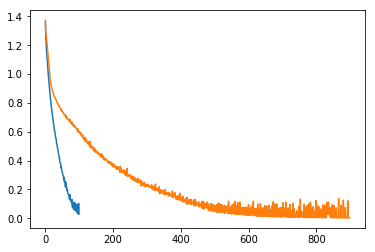

In [59]:
with open("../../../all_deep/recurrent_autoencoder/learning progress 100_100_spacers") as f:
    ll = f.readlines()

plt.plot([float(x[-7:-1]) for x in ll[::2]])
plt.plot(learning_progress.history['loss'] + learning_progress2.history['loss']+ learning_progress3.history['loss'] + learning_progress4.history['loss']+learning_progress5.history['loss'])


plt.show()

In [58]:
total_model.save_weights("./2-layersX20_800_epochs_100_spacers_RAE")

In [61]:
np.save("learning_progress_2layers_autoencoder_20units_each", np.array(learning_progress.history['loss'] + learning_progress2.history['loss']+ learning_progress3.history['loss'] + learning_progress4.history['loss']+learning_progress5.history['loss']))